In [516]:
import ebf
import numpy as np
import matplotlib.pyplot as plt
from start_plot import *
%matplotlib inline
galaxia = ebf.read('/Users/astrolab/Work/GalaxiaData/Examples/280_m60_10.ebf')
parsec = np.genfromtxt('/Users/astrolab/Work/UFD/ugali/isochrones/padova_v3/iso_a12.5_z0.00020.dat',\
                       dtype = None, names = True, skip_header=12)

# sample from galaxia, l=280, b=-60, 10 sq deg
### using stars with 16 < g < 23 for the rest of study

distance to farthest star:  349 kpc
total number of stars:  40344


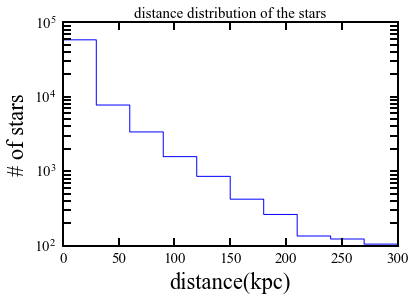

In [564]:
abs_g = galaxia['sdss_g']
abs_r = galaxia['sdss_r']
d = galaxia['rad'] #in kpc
print 'distance to farthest star: %4d kpc' %d.max()

dm = 5*np.log10(d*1000)-5
plt.hist(d, range=[0,300],histtype='step')
plt.gca().set_yscale("log")
plt.xlabel('distance(kpc)')
plt.ylabel('# of stars')
plt.title('distance distribution of the stars')

app_g = galaxia['sdss_g']+5*np.log10(d*1000)-5
app_r = galaxia['sdss_r']+5*np.log10(d*1000)-5
popid = galaxia['popid']
logg = galaxia['grav']
teff = galaxia['teff']  # log(Teff)

magrange_mask = (app_g < 23)&(app_g > 16)
print 'total number of stars: %6d' %len(app_g[magrange_mask])

import bovy_coords
temp = bovy_coords.vxvyvz_to_vrpmllpmbb(galaxia['vx'], galaxia['vy'],\
                                                    galaxia['vz'], galaxia['glon'],\
                                                    galaxia['glat'], galaxia['rad'],\
                                                   XYZ=False, degree=True)
vr = np.array(temp[:,0], dtype=float)
pmll = np.array(temp[:,1], dtype=float)
pmbb = np.array(temp[:,2], dtype=float)
pm = np.sqrt(pmll**2+pmbb**2)

### Figure caption: plot shows the distribution of the stars in heliocentric distance (kpc)

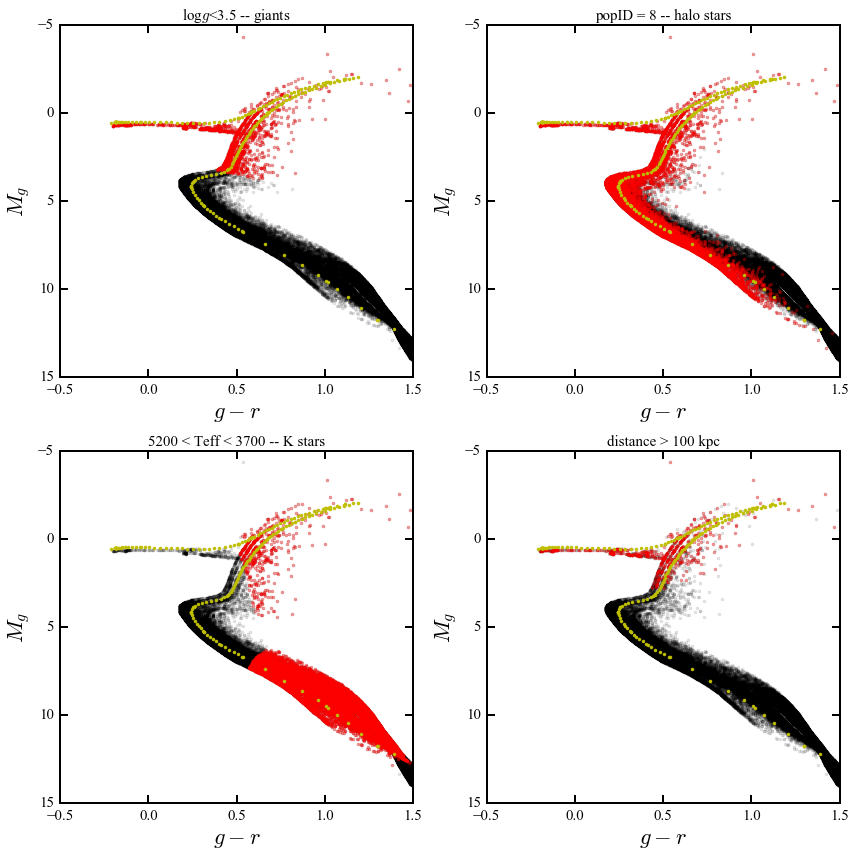

In [250]:
plt.figure(figsize=[12,12])

plt.subplot(2,2,1)
mask = (logg < 3.5)&magrange_mask
plt.plot(abs_g[magrange_mask]-abs_r[magrange_mask],abs_g[magrange_mask],'.k',alpha=0.1)
plt.plot(abs_g[mask]-abs_r[mask],abs_g[mask],'.r',alpha=0.3)
plt.plot(parsec['DESg']-parsec['DESr'], parsec['DESg'],'.y')
plt.ylim(15,-5)
plt.xlim(-0.5,1.5)
plt.xlabel('$g-r$')
plt.ylabel('$M_g$')
plt.title('log$g$<3.5 -- giants')

plt.subplot(2,2,2)
mask = (popid ==8)&magrange_mask
plt.plot(abs_g[magrange_mask]-abs_r[magrange_mask],abs_g[magrange_mask],'.k',alpha=0.1)
plt.plot(abs_g[mask]-abs_r[mask],abs_g[mask],'.r',alpha=0.3)
plt.plot(parsec['DESg']-parsec['DESr'], parsec['DESg'],'.y')
plt.ylim(15,-5)
plt.xlim(-0.5,1.5)
plt.xlabel('$g-r$')
plt.ylabel('$M_g$')
plt.title('popID = 8 -- halo stars')

plt.subplot(2,2,3)
mask = (teff > np.log10(3700)) & (teff < np.log10(5200))&magrange_mask
plt.plot(abs_g[magrange_mask]-abs_r[magrange_mask],abs_g[magrange_mask],'.k',alpha=0.1)
plt.plot(abs_g[mask]-abs_r[mask],abs_g[mask],'.r',alpha=0.3)
plt.plot(parsec['DESg']-parsec['DESr'], parsec['DESg'],'.y')
plt.ylim(15,-5)
plt.xlim(-0.5,1.5)
plt.xlabel('$g-r$')
plt.ylabel('$M_g$')
plt.title('5200 < Teff < 3700 -- K stars')

plt.subplot(2,2,4)
mask = (d > 100)&magrange_mask
plt.plot(abs_g[magrange_mask]-abs_r[magrange_mask],abs_g[magrange_mask],'.k',alpha=0.1)
plt.plot(abs_g[mask]-abs_r[mask],abs_g[mask],'.r',alpha=0.3)
plt.plot(parsec['DESg']-parsec['DESr'], parsec['DESg'],'.y')
plt.ylim(15,-5)
plt.xlim(-0.5,1.5)
plt.xlabel('$g-r$')
plt.ylabel('$M_g$')
plt.title('distance > 100 kpc')

plt.tight_layout()

## Figure caption: absolute magnitude vs g-r for a few different selection criteria of the sample; black dots show the total sample; yellow dots show the parsec isochrone with age = 12.5 Gyr and z = 0.0002. (This isochrone is used throughout the study)
top left -- red dots indicate giants 

top right -- red dots indicate halo stars

bottom left -- red dots indicate K stars (giants+dwarfs)

bottom right -- red dots indicate heliocentric distance > 100 kpc

stars with 16 < g < 23, 0.5 < g-r < 1.0
# of giants:   789
# of dwarfs:  8292
median distance of giants:  68.4 kpc 

in range 16 < g < 17, 0.5 < g-r < 1.0
# of giants:   115, # of dwarfs:  620, median distance of giants:   5.0 kpc

in range 17 < g < 18, 0.5 < g-r < 1.0
# of giants:    64, # of dwarfs:  796, median distance of giants:  18.9 kpc

in range 18 < g < 19, 0.5 < g-r < 1.0
# of giants:    59, # of dwarfs: 1046, median distance of giants:  30.5 kpc

in range 19 < g < 20, 0.5 < g-r < 1.0
# of giants:    90, # of dwarfs: 1270, median distance of giants:  50.3 kpc

in range 20 < g < 21, 0.5 < g-r < 1.0
# of giants:   127, # of dwarfs: 1240, median distance of giants:  82.3 kpc

in range 21 < g < 22, 0.5 < g-r < 1.0
# of giants:   152, # of dwarfs: 1381, median distance of giants: 119.6 kpc

in range 22 < g < 23, 0.5 < g-r < 1.0
# of giants:   182, # of dwarfs: 1939, median distance of giants: 167.1 kpc

in range 16 < g < 23, 0.5 < g-r < 0.6
# of giants:   471, # of dwarfs: 1826, m

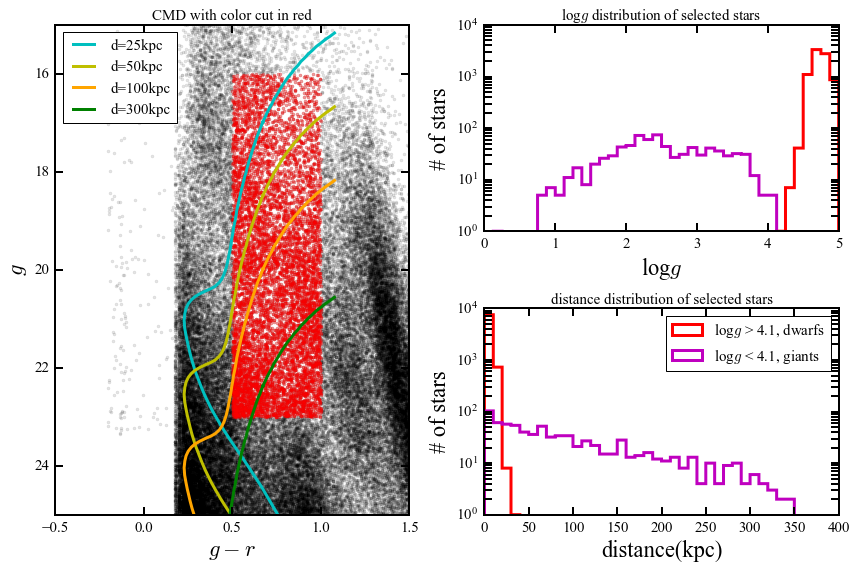

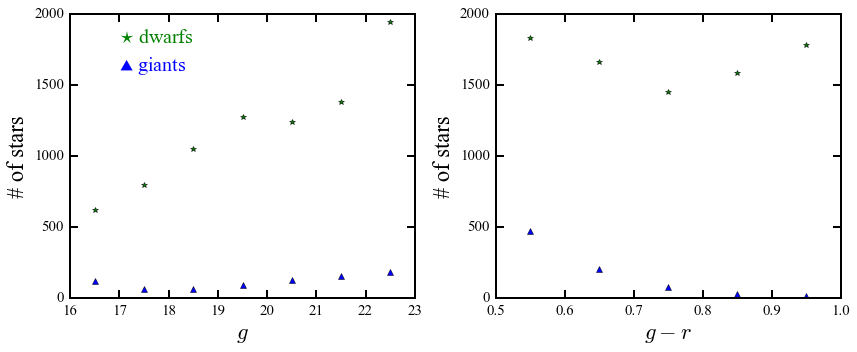

In [544]:
parsec_giant = parsec[:-82]

maskcolor = ((app_g - app_r)>0.5)&((app_g - app_r)<1.0)&magrange_mask

plt.figure(figsize=[12,8])
plt.subplot(1,2,1)
plt.plot(app_g-app_r,app_g,'.k',alpha=0.1)
plt.plot(app_g[maskcolor]-app_r[maskcolor],app_g[maskcolor],'.r',alpha=0.3)
d0 = 25 # 25 kpc
dm0 = 5*np.log10(d0*1000)-5
plt.plot(parsec_giant['DESg']-parsec_giant['DESr'], parsec_giant['DESg'] + dm0,'c', lw=3, label='d=25kpc')
d1 = 50 # 50 kpc
dm1 = 5*np.log10(d1*1000)-5
plt.plot(parsec_giant['DESg']-parsec_giant['DESr'], parsec_giant['DESg'] + dm1,'y', lw=3, label='d=50kpc')
d2 = 100 # 100 kpc
dm2 = 5*np.log10(d2*1000)-5
plt.plot(parsec_giant['DESg']-parsec_giant['DESr'], parsec_giant['DESg'] + dm2,'orange', lw=3, label='d=100kpc')
d3 = 300 # 300 kpc
dm3 = 5*np.log10(d3*1000)-5
plt.plot(parsec_giant['DESg']-parsec_giant['DESr'], parsec_giant['DESg'] + dm3,'g', lw=3, label='d=300kpc')
plt.legend(loc=2)
plt.ylim(25,15)
plt.xlim(-0.5,1.5)
plt.xlabel('$g-r$')
plt.ylabel('$g$')
plt.title('CMD with color cut in red')

mask1 = maskcolor&(logg>4.1)
mask2 = maskcolor&(logg<4.1)

plt.subplot(2,2,2)
plt.hist(logg[mask1],bins = 40,histtype='step',lw=3,range=[0,5],color='r',label='log$g$ > 4.1, dwarfs')
plt.hist(logg[mask2],bins = 40,histtype='step',lw=3,range=[0,5],color='m',label='log$g$ < 4.1, giants')
plt.gca().set_yscale("log")
plt.title('log$g$ distribution of selected stars')
plt.xlabel('log$g$')
plt.ylabel('# of stars')
plt.subplot(2,2,4)
plt.hist(d[mask1],bins = 40,histtype='step',lw=3,range=[0,400],color='r',label='log$g$ > 4.1, dwarfs')
plt.hist(d[mask2],bins = 40,histtype='step',lw=3,range=[0,400],color='m',label='log$g$ < 4.1, giants')
plt.legend()
plt.gca().set_yscale("log")
plt.title('distance distribution of selected stars')
plt.xlabel('distance(kpc)')
plt.ylabel('# of stars')

print 'stars with 16 < g < 23, 0.5 < g-r < 1.0'
print '# of giants: %5d' %len(d[mask2])
print '# of dwarfs: %5d' %len(d[mask1])
print 'median distance of giants: %5.1f kpc \n' %np.median(d[mask2])
plt.tight_layout()

plt.figure(figsize=[12,5])
plt.subplot(1,2,1)
def numcal(lowerlimit, upperlimit):
    mask1 = (logg>4.1)&((app_g - app_r)>0.5)&((app_g - app_r)<1.0)&(app_g < upperlimit)&(app_g > lowerlimit)
    mask2 = (logg<4.1)&((app_g - app_r)>0.5)&((app_g - app_r)<1.0)&(app_g < upperlimit)&(app_g > lowerlimit)
    return mask2, mask1

for i in range(16,23):
    (gc,dc) = numcal(i,i+1)
    plt.plot(i+0.5,len(d[gc]),'^b')
    plt.plot(i+0.5,len(d[dc]),'*g')
    print 'in range %2d < g < %2d, 0.5 < g-r < 1.0' %(i,i+1)
    print '# of giants: %5d, # of dwarfs: %4d, median distance of giants: %5.1f kpc\n' %(len(d[gc]), len(d[dc]), np.median(d[gc]))
plt.text(17,1800,'$\star$ dwarfs', color='g',fontsize=20)    
plt.text(17,1600,'$\\blacktriangle$ giants', color='b',fontsize=20)    
plt.xlabel('$g$')
plt.ylabel('# of stars')

plt.subplot(1,2,2)
def numcal(lowerlimit, upperlimit):
    mask1 = (logg>4.1)&((app_g - app_r)>lowerlimit)&((app_g - app_r)<upperlimit)&(app_g > 16)&(app_g < 23)
    mask2 = (logg<4.1)&((app_g - app_r)>lowerlimit)&((app_g - app_r)<upperlimit)&(app_g > 16)&(app_g < 23)
    return mask2, mask1

colorstep = 0.1
for i in np.arange(0.5,1,colorstep):
    (gc,dc) = numcal(i,i+colorstep)
    plt.plot(i+colorstep/2,len(d[gc]),'^b')
    plt.plot(i+colorstep/2,len(d[dc]),'*g')
    print 'in range 16 < g < 23, %3.1f < g-r < %3.1f' %(i,i+colorstep)
    print '# of giants: %5d, # of dwarfs: %4d, median distance of giants: %5.1f kpc\n' %(len(d[gc]), len(d[dc]), np.median(d[gc]))
plt.xlabel('$g-r$')
plt.ylabel('# of stars')
plt.ylim(0,2000)
a = plt.xlim(0.5,1)

plt.tight_layout()


## stars with a constant color cut 0.5 < g-r < 1.0
780 giants and 8292 dwarfs in this criteria

## Figure Caption:
top left -- CMD of the sample. Red dots indicate stars meeting the selection criteria (sample used for the rest three panels in this figure), 4 lines show the parsec isochrone at distance 25, 50, 100, 300 kpc

top right -- distribution of the logg and distance for the stars selected with color cut, giants (logg < 4.1) in purple and dwarfs (logg > 4.1) in red. (note the y-axis is in log scale)

### break up the selected sample in different magnitude bin and color bin

bottom left -- number of dwarfs (giants) as a function of g-band magnitude (numbers are printed out in front of the plot)

bottom right -- number of dwarfs (giants) as a function of g-r color (numbers are printed out in front of the plot)

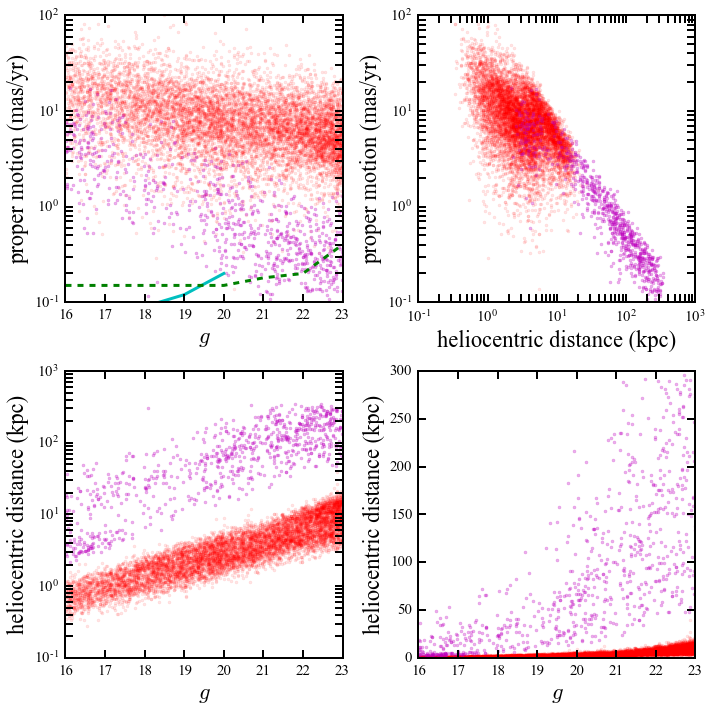

In [593]:
plt.figure(figsize=[10,10])
plt.subplot(2,2,1)
plt.plot(app_g[mask1],pm[mask1],'r.', alpha=0.1)
plt.plot(app_g[mask2],pm[mask2],'m.', alpha=0.3)
plt.gca().set_yscale("log")
plt.ylim(0.1,100)
plt.ylabel('proper motion (mas/yr)')
plt.xlabel('$g$')

mag1 = np.arange(16,20.1,1.)
gaia = np.array([0.03,0.06,0.09, 0.12, 0.2])
mag2 = np.arange(16,23.1,1.)
lsst = np.array([0.15, 0.15, 0.15, 0.15, 0.15, 0.18, 0.20, 0.4])
plt.plot(mag1,gaia,'-c',lw=3)
plt.plot(mag2,lsst,'--g',lw=3)


plt.subplot(2,2,2)
plt.plot(d[mask1],pm[mask1],'r.', alpha=0.1)
plt.plot(d[mask2],pm[mask2],'m.', alpha=0.3)
plt.gca().set_yscale("log")
plt.gca().set_xscale("log")
plt.ylabel('proper motion (mas/yr)')
plt.xlabel('heliocentric distance (kpc)')
plt.ylim(0.1,100)

plt.subplot(2,2,3)
plt.plot(app_g[mask1],d[mask1],'r.', alpha=0.1)
plt.plot(app_g[mask2],d[mask2],'m.', alpha=0.3)
plt.gca().set_yscale("log")
plt.ylabel('heliocentric distance (kpc)')
plt.xlabel('$g$')
plt.ylim(0.1,1000)

plt.subplot(2,2,4)
plt.plot(app_g[mask1],d[mask1],'r.', alpha=0.1, label='log$g$ > 4.1, dwarfs')
plt.plot(app_g[mask2],d[mask2],'m.', alpha=0.3, label='log$g$ < 4.1, giants')
plt.ylabel('heliocentric distance (kpc)')
plt.xlabel('$g$')
plt.ylim(0,300)
plt.legend()
plt.tight_layout()

## Figure caption: same color cut as the previous plots (0.5 < g-r < 1)
purple -- giants, red -- dwarfs, green dashed line -- LSST precision, cyan line -- Gaia precision

top left -- proper motion vs g-band magnitude

top right -- proper motion vs heliocentric distance

bottom -- heliocentric distance vs g-band magnitude in log scale (left) and linear scale(right)




stars with isochrone filter at distance =  50 kpc
# of giants:   862
# of dwarfs:  4735
median distance of giants:  55.0 kpc 

in range 16 < g < 17, 0.5 < g-r < 1.0
# of giants:     1, # of dwarfs:   84, median diatance of giants:  47.4 kpc

in range 17 < g < 18, 0.5 < g-r < 1.0
# of giants:     5, # of dwarfs:  268, median diatance of giants:  45.2 kpc

in range 18 < g < 19, 0.5 < g-r < 1.0
# of giants:    21, # of dwarfs:  434, median diatance of giants:  36.9 kpc

in range 19 < g < 20, 0.5 < g-r < 1.0
# of giants:    91, # of dwarfs:  483, median diatance of giants:  33.3 kpc

in range 20 < g < 21, 0.5 < g-r < 1.0
# of giants:   179, # of dwarfs:  436, median diatance of giants:  43.9 kpc

in range 21 < g < 22, 0.5 < g-r < 1.0
# of giants:   253, # of dwarfs: 1056, median diatance of giants:  53.4 kpc

in range 22 < g < 23, 0.5 < g-r < 1.0
# of giants:   312, # of dwarfs: 1974, median diatance of giants:  59.9 kpc

in range 16 < g < 23, 0.5 < g-r < 0.6
# of giants:   181, # of dwarf

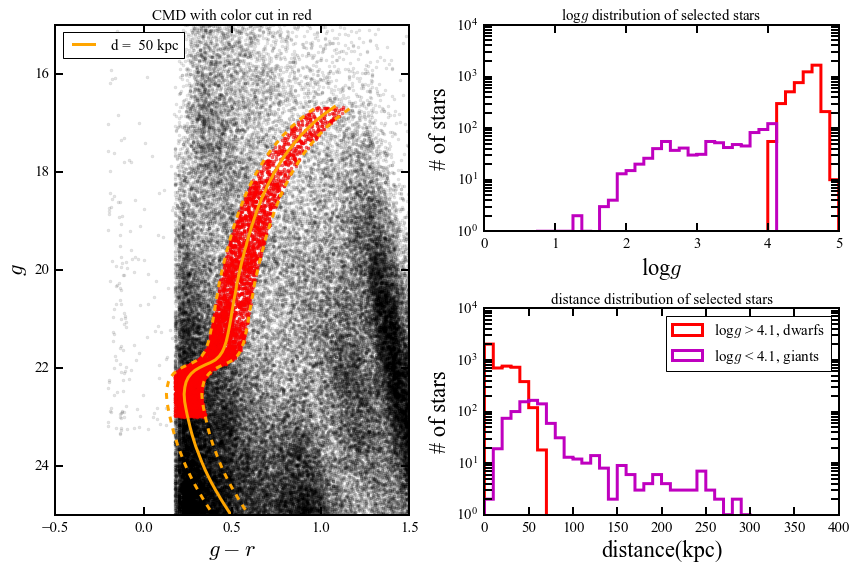

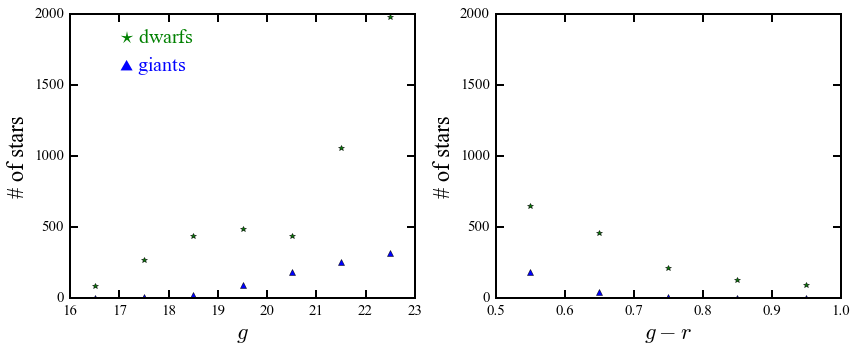

In [595]:
parsec_giant = parsec[:-82]

plt.figure(figsize=[12,8])
plt.subplot(1,2,1)
d2 = 50 # distance to earch in kpc
dm2 = 5*np.log10(d2*1000)-5


gmin = min(parsec_giant['DESg'][::-1]+dm2)
gmax = 23
parsec_magrange = (app_g > gmin) & (app_g < gmax)
gr = np.interp(app_g, parsec_giant['DESg'][::-1]+dm2,parsec_giant['DESg'][::-1]-parsec_giant['DESr'][::-1])

colorrange = parsec_magrange & (app_g-app_r< gr+0.1) & ((app_g-app_r > gr-0.1))

plt.plot(app_g-app_r,app_g,'.k',alpha=0.1)
plt.plot(app_g[colorrange]-app_r[colorrange],app_g[colorrange],'r.',alpha=0.5 )

plt.plot(parsec_giant['DESg']-parsec_giant['DESr'], parsec_giant['DESg']+ dm2,'orange', lw=3, label='d = %3d kpc'%d2)
plt.plot(parsec_giant['DESg']-parsec_giant['DESr']+0.1, parsec_giant['DESg'] + dm2,'orange', ls='--', lw=3)
plt.plot(parsec_giant['DESg']-parsec_giant['DESr']-0.1, parsec_giant['DESg'] + dm2,'orange', ls='--', lw=3)
plt.legend(loc=2)

plt.ylim(25,15)
plt.xlim(-0.5,1.5)
plt.xlabel('$g-r$')
plt.ylabel('$g$')
plt.title('CMD with color cut in red')


mask1 = colorrange&(logg>4.1)
mask2 = colorrange&(logg<4.1)

plt.subplot(2,2,2)
plt.hist(logg[mask1],bins = 40,histtype='step',lw=3,range=[0,5],color='r',label='log$g$ > 4.1, dwarfs')
plt.hist(logg[mask2],bins = 40,histtype='step',lw=3,range=[0,5],color='m',label='log$g$ < 4.1, giants')
plt.gca().set_yscale("log")
plt.title('log$g$ distribution of selected stars')
plt.xlabel('log$g$')
plt.ylabel('# of stars')
plt.subplot(2,2,4)
plt.hist(d[mask1],bins = 40,histtype='step',lw=3,range=[0,400],color='r',label='log$g$ > 4.1, dwarfs')
plt.hist(d[mask2],bins = 40,histtype='step',lw=3,range=[0,400],color='m',label='log$g$ < 4.1, giants')
plt.legend()
plt.gca().set_yscale("log")
plt.title('distance distribution of selected stars')
plt.xlabel('distance(kpc)')
plt.ylabel('# of stars')

print 'stars with isochrone filter at distance = %3d kpc' %(d2)
print '# of giants: %5d' %len(d[mask2])
print '# of dwarfs: %5d' %len(d[mask1])
print 'median distance of giants: %5.1f kpc \n' %np.median(d[mask2])
plt.tight_layout()


plt.figure(figsize=[12,5])
plt.subplot(1,2,1)
def numcal(lowerlimit, upperlimit):
    mask1 = (logg>4.1)&colorrange&(app_g < upperlimit)&(app_g > lowerlimit)
    mask2 = (logg<4.1)&colorrange&(app_g < upperlimit)&(app_g > lowerlimit)
    return mask2, mask1

for i in range(16,23):
    (gc,dc) = numcal(i,i+1)
    plt.plot(i+0.5,len(d[gc]),'^b')
    plt.plot(i+0.5,len(d[dc]),'*g')
    print 'in range %2d < g < %2d, 0.5 < g-r < 1.0' %(i,i+1)
    print '# of giants: %5d, # of dwarfs: %4d, median diatance of giants: %5.1f kpc\n' %(len(d[gc]), len(d[dc]), np.median(d[gc]))
plt.text(17,1800,'$\star$ dwarfs', color='g',fontsize=20)    
plt.text(17,1600,'$\\blacktriangle$ giants', color='b',fontsize=20)    
plt.xlabel('$g$')
plt.ylabel('# of stars')
plt.ylim(0,2000)

plt.subplot(1,2,2)
def numcal(lowerlimit, upperlimit):
    mask1 = (logg>4.1)&colorrange&((app_g - app_r)>lowerlimit)&((app_g - app_r)<upperlimit)
    mask2 = (logg<4.1)&colorrange&((app_g - app_r)>lowerlimit)&((app_g - app_r)<upperlimit)
    return mask2, mask1

colorstep = 0.1
for i in np.arange(0.5,1,colorstep):
    (gc,dc) = numcal(i,i+colorstep)
    plt.plot(i+colorstep/2,len(d[gc]),'^b')
    plt.plot(i+colorstep/2,len(d[dc]),'*g')
    print 'in range 16 < g < 23, %3.1f < g-r < %3.1f' %(i,i+colorstep)
    print '# of giants: %5d, # of dwarfs: %4d, median diatance of giants: %5.1f kpc\n' %(len(d[gc]), len(d[dc]), np.median(d[gc]))
plt.xlabel('$g-r$')
plt.ylabel('# of stars')
plt.ylim(0,2000)
plt.xlim(0.5,1)

plt.tight_layout()

## stars with a isochrone filter at distance = 50 kpc
two dashed lines in the top left panel indicates the selection criteria, which is +/- 0.1 of the g-r color of isochrone at distance = 50 kpc. Red dots indicate stars meeting the selection criteria. 862 giants and 4735 dwarfs in this criteria. Figures are the same way as the previous plots.


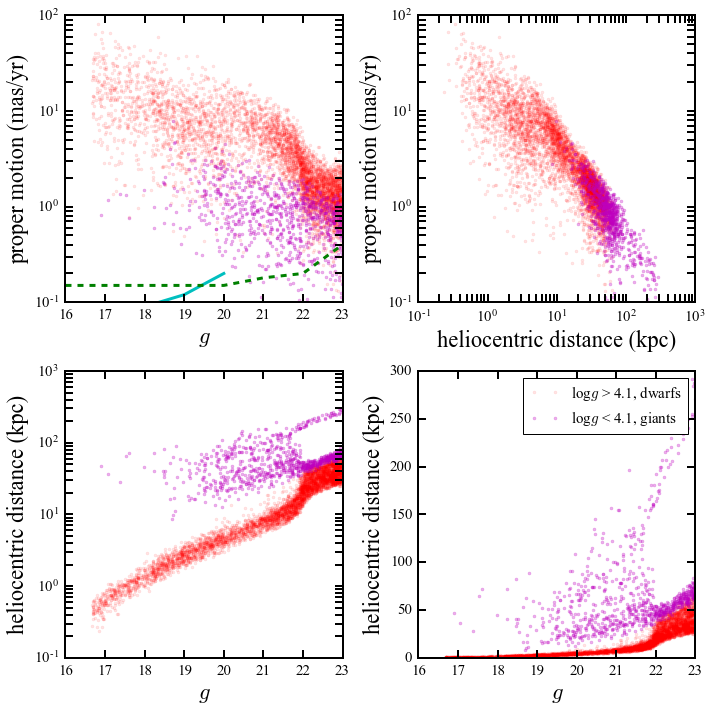

In [596]:
plt.figure(figsize=[10,10])
plt.subplot(2,2,1)
plt.plot(app_g[mask1],pm[mask1],'r.', alpha=0.1)
plt.plot(app_g[mask2],pm[mask2],'m.', alpha=0.3)
plt.gca().set_yscale("log")
plt.ylim(0.1,100)
plt.ylabel('proper motion (mas/yr)')
plt.xlabel('$g$')

mag1 = np.arange(16,20.1,1.)
gaia = np.array([0.03,0.06,0.09, 0.12, 0.2])
mag2 = np.arange(16,23.1,1.)
lsst = np.array([0.15, 0.15, 0.15, 0.15, 0.15, 0.18, 0.20, 0.4])
plt.plot(mag1,gaia,'-c',lw=3)
plt.plot(mag2,lsst,'--g',lw=3)


plt.subplot(2,2,2)
plt.plot(d[mask1],pm[mask1],'r.', alpha=0.1)
plt.plot(d[mask2],pm[mask2],'m.', alpha=0.3)
plt.gca().set_yscale("log")
plt.gca().set_xscale("log")
plt.ylabel('proper motion (mas/yr)')
plt.xlabel('heliocentric distance (kpc)')
plt.ylim(0.1,100)

plt.subplot(2,2,3)
plt.plot(app_g[mask1],d[mask1],'r.', alpha=0.1)
plt.plot(app_g[mask2],d[mask2],'m.', alpha=0.3)
plt.gca().set_yscale("log")
plt.ylabel('heliocentric distance (kpc)')
plt.xlabel('$g$')
plt.ylim(0.1,1000)

plt.subplot(2,2,4)
plt.plot(app_g[mask1],d[mask1],'r.', alpha=0.1, label='log$g$ > 4.1, dwarfs')
plt.plot(app_g[mask2],d[mask2],'m.', alpha=0.3, label='log$g$ < 4.1, giants')
plt.ylabel('heliocentric distance (kpc)')
plt.xlabel('$g$')
plt.ylim(0,300)
plt.legend()
plt.tight_layout()

## Figure caption: color cut with isochrone at 50 = kpc.


stars with isochrone filter at distance = 100 kpc
# of giants:   679
# of dwarfs:  3142
median distance of giants:  87.8 kpc 

in range 16 < g < 17, 0.5 < g-r < 1.0
# of giants:     0, # of dwarfs:    0, median diatance of giants:   nan kpc

in range 17 < g < 18, 0.5 < g-r < 1.0
# of giants:     0, # of dwarfs:    0, median diatance of giants:   nan kpc

in range 18 < g < 19, 0.5 < g-r < 1.0
# of giants:     2, # of dwarfs:  339, median diatance of giants:  89.1 kpc

in range 19 < g < 20, 0.5 < g-r < 1.0
# of giants:    28, # of dwarfs:  510, median diatance of giants:  69.5 kpc

in range 20 < g < 21, 0.5 < g-r < 1.0
# of giants:    93, # of dwarfs:  370, median diatance of giants:  83.3 kpc

in range 21 < g < 22, 0.5 < g-r < 1.0
# of giants:   223, # of dwarfs:  658, median diatance of giants:  77.9 kpc

in range 22 < g < 23, 0.5 < g-r < 1.0
# of giants:   333, # of dwarfs: 1265, median diatance of giants:  96.0 kpc

in range 16 < g < 23, 0.5 < g-r < 0.6
# of giants:   254, # of dwarf

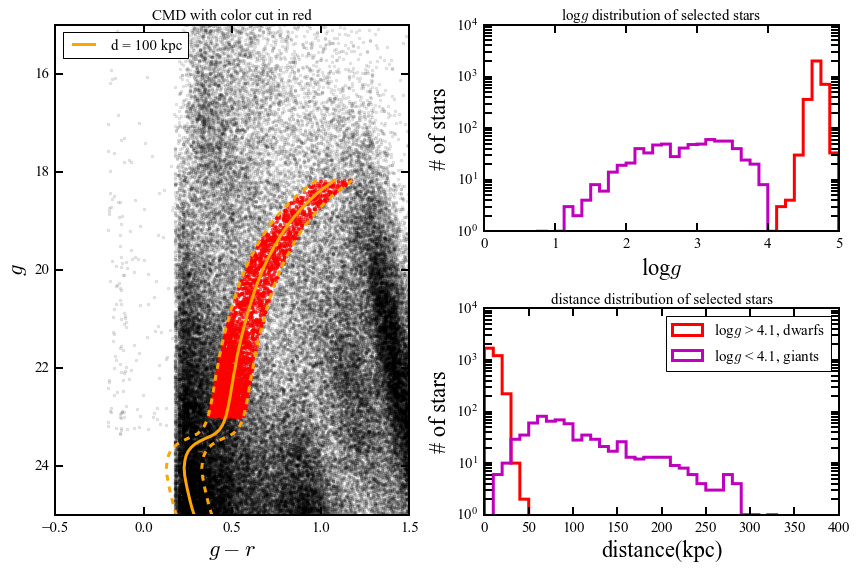

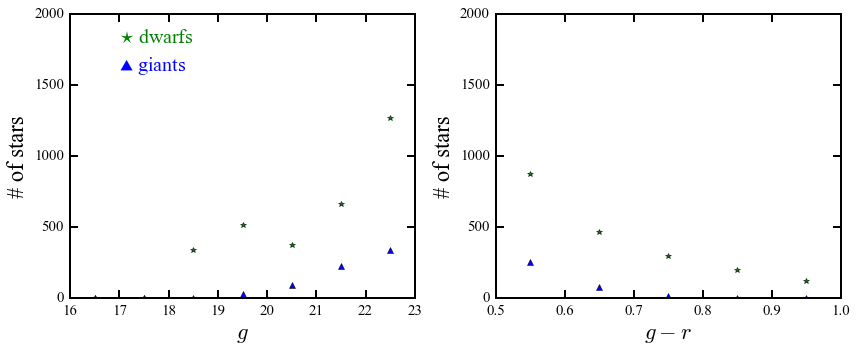

In [600]:
parsec_giant = parsec[:-82]

plt.figure(figsize=[12,8])
plt.subplot(1,2,1)
d2 = 100 # distance to earch in kpc
dm2 = 5*np.log10(d2*1000)-5


gmin = min(parsec_giant['DESg'][::-1]+dm2)
gmax = 23
parsec_magrange = (app_g > gmin) & (app_g < gmax)
gr = np.interp(app_g, parsec_giant['DESg'][::-1]+dm2,parsec_giant['DESg'][::-1]-parsec_giant['DESr'][::-1])

colorrange = parsec_magrange & (app_g-app_r< gr+0.1) & ((app_g-app_r > gr-0.1))

plt.plot(app_g-app_r,app_g,'.k',alpha=0.1)
plt.plot(app_g[colorrange]-app_r[colorrange],app_g[colorrange],'r.',alpha=0.5 )

plt.plot(parsec_giant['DESg']-parsec_giant['DESr'], parsec_giant['DESg']+ dm2,'orange', lw=3, label='d = %3d kpc'%d2)
plt.plot(parsec_giant['DESg']-parsec_giant['DESr']+0.1, parsec_giant['DESg'] + dm2,'orange', ls='--', lw=3)
plt.plot(parsec_giant['DESg']-parsec_giant['DESr']-0.1, parsec_giant['DESg'] + dm2,'orange', ls='--', lw=3)
plt.legend(loc=2)

plt.ylim(25,15)
plt.xlim(-0.5,1.5)
plt.xlabel('$g-r$')
plt.ylabel('$g$')
plt.title('CMD with color cut in red')


mask1 = colorrange&(logg>4.1)
mask2 = colorrange&(logg<4.1)

plt.subplot(2,2,2)
plt.hist(logg[mask1],bins = 40,histtype='step',lw=3,range=[0,5],color='r',label='log$g$ > 4.1, dwarfs')
plt.hist(logg[mask2],bins = 40,histtype='step',lw=3,range=[0,5],color='m',label='log$g$ < 4.1, giants')
plt.gca().set_yscale("log")
plt.title('log$g$ distribution of selected stars')
plt.xlabel('log$g$')
plt.ylabel('# of stars')
plt.subplot(2,2,4)
plt.hist(d[mask1],bins = 40,histtype='step',lw=3,range=[0,400],color='r',label='log$g$ > 4.1, dwarfs')
plt.hist(d[mask2],bins = 40,histtype='step',lw=3,range=[0,400],color='m',label='log$g$ < 4.1, giants')
plt.legend()
plt.gca().set_yscale("log")
plt.title('distance distribution of selected stars')
plt.xlabel('distance(kpc)')
plt.ylabel('# of stars')

print 'stars with isochrone filter at distance = %3d kpc' %(d2)
print '# of giants: %5d' %len(d[mask2])
print '# of dwarfs: %5d' %len(d[mask1])
print 'median distance of giants: %5.1f kpc \n' %np.median(d[mask2])
plt.tight_layout()

plt.figure(figsize=[12,5])
plt.subplot(1,2,1)
def numcal(lowerlimit, upperlimit):
    mask1 = (logg>4.1)&colorrange&(app_g < upperlimit)&(app_g > lowerlimit)
    mask2 = (logg<4.1)&colorrange&(app_g < upperlimit)&(app_g > lowerlimit)
    return mask2, mask1

for i in range(16,23):
    (gc,dc) = numcal(i,i+1)
    plt.plot(i+0.5,len(d[gc]),'^b')
    plt.plot(i+0.5,len(d[dc]),'*g')
    print 'in range %2d < g < %2d, 0.5 < g-r < 1.0' %(i,i+1)
    print '# of giants: %5d, # of dwarfs: %4d, median diatance of giants: %5.1f kpc\n' %(len(d[gc]), len(d[dc]), np.median(d[gc]))
plt.text(17,1800,'$\star$ dwarfs', color='g',fontsize=20)    
plt.text(17,1600,'$\\blacktriangle$ giants', color='b',fontsize=20)    
plt.xlabel('$g$')
plt.ylabel('# of stars')
plt.ylim(0,2000)

plt.subplot(1,2,2)
def numcal(lowerlimit, upperlimit):
    mask1 = (logg>4.1)&colorrange&((app_g - app_r)>lowerlimit)&((app_g - app_r)<upperlimit)
    mask2 = (logg<4.1)&colorrange&((app_g - app_r)>lowerlimit)&((app_g - app_r)<upperlimit)
    return mask2, mask1

colorstep = 0.1
for i in np.arange(0.5,1,colorstep):
    (gc,dc) = numcal(i,i+colorstep)
    plt.plot(i+colorstep/2,len(d[gc]),'^b')
    plt.plot(i+colorstep/2,len(d[dc]),'*g')
    print 'in range 16 < g < 23, %3.1f < g-r < %3.1f' %(i,i+colorstep)
    print '# of giants: %5d, # of dwarfs: %4d, median diatance of giants: %5.1f kpc\n' %(len(d[gc]), len(d[dc]), np.median(d[gc]))
plt.xlabel('$g-r$')
plt.ylabel('# of stars')
plt.ylim(0,2000)
plt.xlim(0.5,1)

plt.tight_layout()


## Figure:  similar to previous figure but at distance = 100 kpc
679 giants and 3142 dwarfs

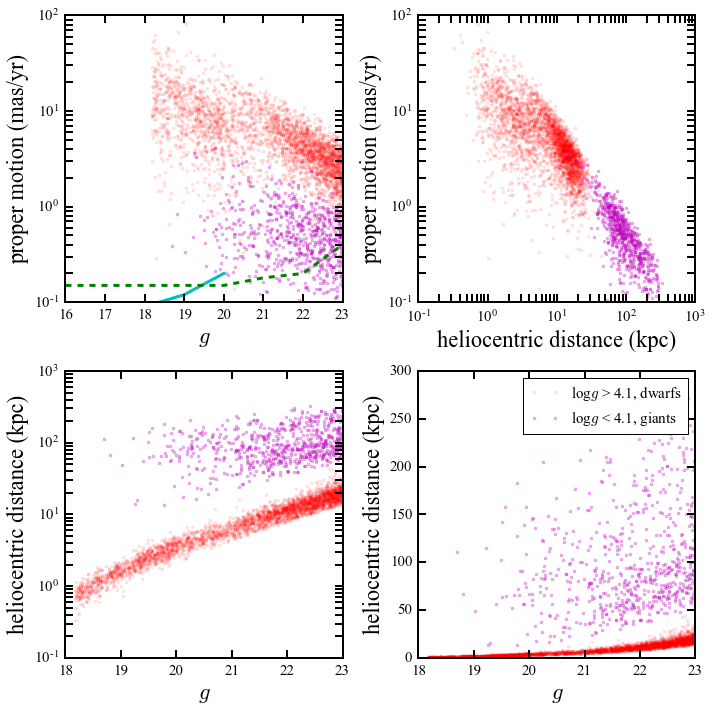

In [601]:
plt.figure(figsize=[10,10])
plt.subplot(2,2,1)
plt.plot(app_g[mask1],pm[mask1],'r.', alpha=0.1)
plt.plot(app_g[mask2],pm[mask2],'m.', alpha=0.3)
plt.gca().set_yscale("log")
plt.ylim(0.1,100)
plt.ylabel('proper motion (mas/yr)')
plt.xlabel('$g$')

mag1 = np.arange(16,20.1,1.)
gaia = np.array([0.03,0.06,0.09, 0.12, 0.2])
mag2 = np.arange(16,23.1,1.)
lsst = np.array([0.15, 0.15, 0.15, 0.15, 0.15, 0.18, 0.20, 0.4])
plt.plot(mag1,gaia,'-c',lw=3)
plt.plot(mag2,lsst,'--g',lw=3)


plt.subplot(2,2,2)
plt.plot(d[mask1],pm[mask1],'r.', alpha=0.1)
plt.plot(d[mask2],pm[mask2],'m.', alpha=0.3)
plt.gca().set_yscale("log")
plt.gca().set_xscale("log")
plt.ylabel('proper motion (mas/yr)')
plt.xlabel('heliocentric distance (kpc)')
plt.ylim(0.1,100)

plt.subplot(2,2,3)
plt.plot(app_g[mask1],d[mask1],'r.', alpha=0.1)
plt.plot(app_g[mask2],d[mask2],'m.', alpha=0.3)
plt.gca().set_yscale("log")
plt.ylabel('heliocentric distance (kpc)')
plt.xlabel('$g$')
plt.ylim(0.1,1000)

plt.subplot(2,2,4)
plt.plot(app_g[mask1],d[mask1],'r.', alpha=0.1, label='log$g$ > 4.1, dwarfs')
plt.plot(app_g[mask2],d[mask2],'m.', alpha=0.3, label='log$g$ < 4.1, giants')
plt.ylabel('heliocentric distance (kpc)')
plt.xlabel('$g$')
plt.ylim(0,300)
plt.legend()
plt.tight_layout()

## Figure caption: color cut with isochrone at 100 = kpc.


stars with isochrone filter at distance = 300 kpc
# of giants:   116
# of dwarfs:  1723
median distance of giants: 196.1 kpc 

in range 16 < g < 17, 0.5 < g-r < 1.0
# of giants:     0, # of dwarfs:    0, median diatance of giants:   nan kpc

in range 17 < g < 18, 0.5 < g-r < 1.0
# of giants:     0, # of dwarfs:    0, median diatance of giants:   nan kpc

in range 18 < g < 19, 0.5 < g-r < 1.0
# of giants:     0, # of dwarfs:    0, median diatance of giants:   nan kpc

in range 19 < g < 20, 0.5 < g-r < 1.0
# of giants:     0, # of dwarfs:    0, median diatance of giants:   nan kpc

in range 20 < g < 21, 0.5 < g-r < 1.0
# of giants:     1, # of dwarfs:  377, median diatance of giants: 234.1 kpc

in range 21 < g < 22, 0.5 < g-r < 1.0
# of giants:    20, # of dwarfs:  574, median diatance of giants: 204.3 kpc

in range 22 < g < 23, 0.5 < g-r < 1.0
# of giants:    95, # of dwarfs:  772, median diatance of giants: 188.9 kpc

in range 16 < g < 23, 0.5 < g-r < 0.6
# of giants:    43, # of dwarf

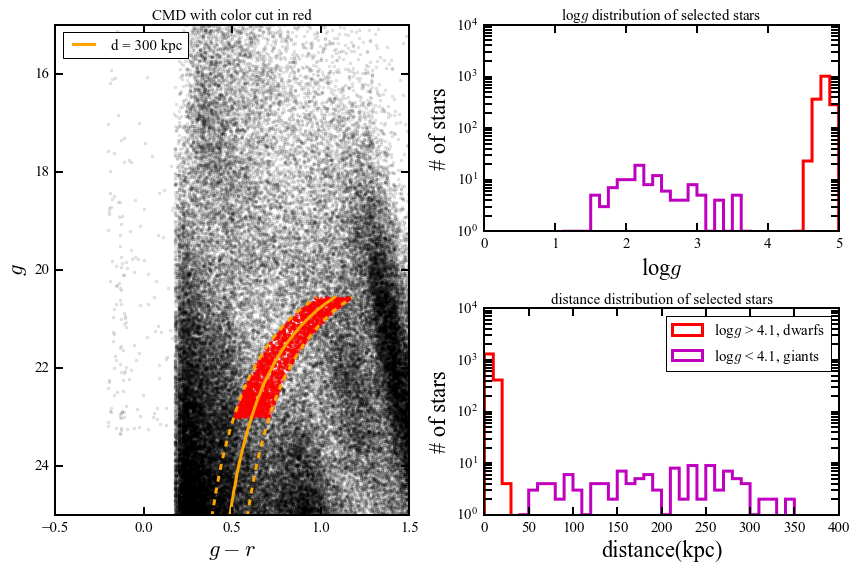

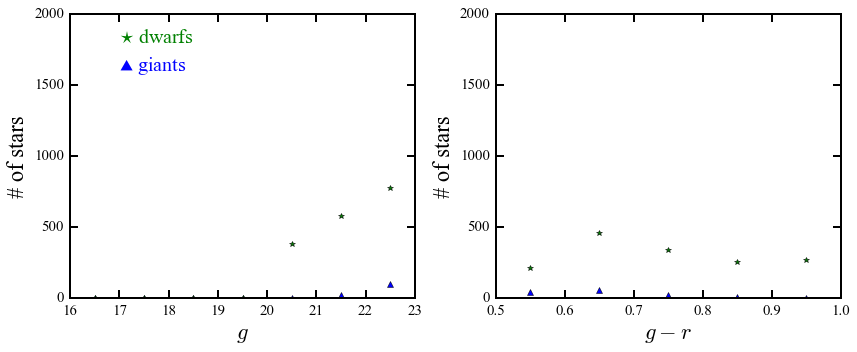

In [597]:
parsec_giant = parsec[:-82]

plt.figure(figsize=[12,8])
plt.subplot(1,2,1)
d2 = 300 # distance to earch in kpc
dm2 = 5*np.log10(d2*1000)-5


gmin = min(parsec_giant['DESg'][::-1]+dm2)
gmax = 23
parsec_magrange = (app_g > gmin) & (app_g < gmax)
gr = np.interp(app_g, parsec_giant['DESg'][::-1]+dm2,parsec_giant['DESg'][::-1]-parsec_giant['DESr'][::-1])

colorrange = parsec_magrange & (app_g-app_r< gr+0.1) & ((app_g-app_r > gr-0.1))

plt.plot(app_g-app_r,app_g,'.k',alpha=0.1)
plt.plot(app_g[colorrange]-app_r[colorrange],app_g[colorrange],'r.',alpha=0.5 )

plt.plot(parsec_giant['DESg']-parsec_giant['DESr'], parsec_giant['DESg']+ dm2,'orange', lw=3, label='d = %3d kpc'%d2)
plt.plot(parsec_giant['DESg']-parsec_giant['DESr']+0.1, parsec_giant['DESg'] + dm2,'orange', ls='--', lw=3)
plt.plot(parsec_giant['DESg']-parsec_giant['DESr']-0.1, parsec_giant['DESg'] + dm2,'orange', ls='--', lw=3)
plt.legend(loc=2)

plt.ylim(25,15)
plt.xlim(-0.5,1.5)
plt.xlabel('$g-r$')
plt.ylabel('$g$')
plt.title('CMD with color cut in red')


mask1 = colorrange&(logg>4.1)
mask2 = colorrange&(logg<4.1)

plt.subplot(2,2,2)
plt.hist(logg[mask1],bins = 40,histtype='step',lw=3,range=[0,5],color='r',label='log$g$ > 4.1, dwarfs')
plt.hist(logg[mask2],bins = 40,histtype='step',lw=3,range=[0,5],color='m',label='log$g$ < 4.1, giants')
plt.gca().set_yscale("log")
plt.title('log$g$ distribution of selected stars')
plt.xlabel('log$g$')
plt.ylabel('# of stars')
plt.subplot(2,2,4)
plt.hist(d[mask1],bins = 40,histtype='step',lw=3,range=[0,400],color='r',label='log$g$ > 4.1, dwarfs')
plt.hist(d[mask2],bins = 40,histtype='step',lw=3,range=[0,400],color='m',label='log$g$ < 4.1, giants')
plt.legend()
plt.gca().set_yscale("log")
plt.title('distance distribution of selected stars')
plt.xlabel('distance(kpc)')
plt.ylabel('# of stars')

print 'stars with isochrone filter at distance = %3d kpc' %(d2)
print '# of giants: %5d' %len(d[mask2])
print '# of dwarfs: %5d' %len(d[mask1])
print 'median distance of giants: %5.1f kpc \n' %np.median(d[mask2])
plt.tight_layout()

plt.figure(figsize=[12,5])
plt.subplot(1,2,1)
def numcal(lowerlimit, upperlimit):
    mask1 = (logg>4.1)&colorrange&(app_g < upperlimit)&(app_g > lowerlimit)
    mask2 = (logg<4.1)&colorrange&(app_g < upperlimit)&(app_g > lowerlimit)
    return mask2, mask1

for i in range(16,23):
    (gc,dc) = numcal(i,i+1)
    plt.plot(i+0.5,len(d[gc]),'^b')
    plt.plot(i+0.5,len(d[dc]),'*g')
    print 'in range %2d < g < %2d, 0.5 < g-r < 1.0' %(i,i+1)
    print '# of giants: %5d, # of dwarfs: %4d, median diatance of giants: %5.1f kpc\n' %(len(d[gc]), len(d[dc]), np.median(d[gc]))
plt.text(17,1800,'$\star$ dwarfs', color='g',fontsize=20)    
plt.text(17,1600,'$\\blacktriangle$ giants', color='b',fontsize=20)    
plt.xlabel('$g$')
plt.ylabel('# of stars')
plt.ylim(0,2000)

plt.subplot(1,2,2)
def numcal(lowerlimit, upperlimit):
    mask1 = (logg>4.1)&colorrange&((app_g - app_r)>lowerlimit)&((app_g - app_r)<upperlimit)
    mask2 = (logg<4.1)&colorrange&((app_g - app_r)>lowerlimit)&((app_g - app_r)<upperlimit)
    return mask2, mask1

colorstep = 0.1
for i in np.arange(0.5,1,colorstep):
    (gc,dc) = numcal(i,i+colorstep)
    plt.plot(i+colorstep/2,len(d[gc]),'^b')
    plt.plot(i+colorstep/2,len(d[dc]),'*g')
    print 'in range 16 < g < 23, %3.1f < g-r < %3.1f' %(i,i+colorstep)
    print '# of giants: %5d, # of dwarfs: %4d, median diatance of giants: %5.1f kpc\n' %(len(d[gc]), len(d[dc]), np.median(d[gc]))
plt.xlabel('$g-r$')
plt.ylabel('# of stars')
plt.ylim(0,2000)
plt.xlim(0.5,1)

plt.tight_layout()



## Figure: similar to previous figure but at distance = 300 kpc 
116 giants and 1723 dwarfs


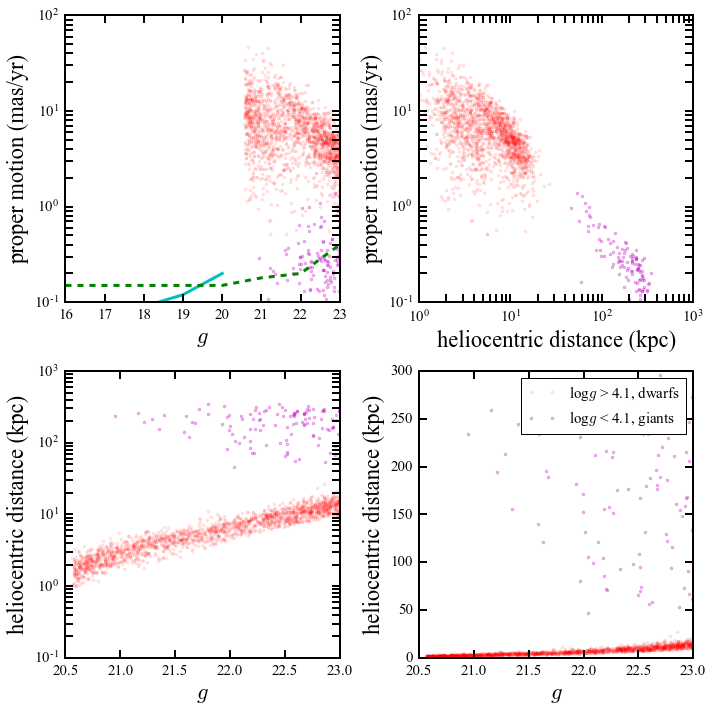

In [599]:
plt.figure(figsize=[10,10])
plt.subplot(2,2,1)
plt.plot(app_g[mask1],pm[mask1],'r.', alpha=0.1)
plt.plot(app_g[mask2],pm[mask2],'m.', alpha=0.3)
plt.gca().set_yscale("log")
plt.ylim(0.1,100)
plt.ylabel('proper motion (mas/yr)')
plt.xlabel('$g$')

mag1 = np.arange(16,20.1,1.)
gaia = np.array([0.03,0.06,0.09, 0.12, 0.2])
mag2 = np.arange(16,23.1,1.)
lsst = np.array([0.15, 0.15, 0.15, 0.15, 0.15, 0.18, 0.20, 0.4])
plt.plot(mag1,gaia,'-c',lw=3)
plt.plot(mag2,lsst,'--g',lw=3)


plt.subplot(2,2,2)
plt.plot(d[mask1],pm[mask1],'r.', alpha=0.1)
plt.plot(d[mask2],pm[mask2],'m.', alpha=0.3)
plt.gca().set_yscale("log")
plt.gca().set_xscale("log")
plt.ylabel('proper motion (mas/yr)')
plt.xlabel('heliocentric distance (kpc)')
plt.ylim(0.1,100)

plt.subplot(2,2,3)
plt.plot(app_g[mask1],d[mask1],'r.', alpha=0.1)
plt.plot(app_g[mask2],d[mask2],'m.', alpha=0.3)
plt.gca().set_yscale("log")
plt.ylabel('heliocentric distance (kpc)')
plt.xlabel('$g$')
plt.ylim(0.1,1000)

plt.subplot(2,2,4)
plt.plot(app_g[mask1],d[mask1],'r.', alpha=0.1, label='log$g$ > 4.1, dwarfs')
plt.plot(app_g[mask2],d[mask2],'m.', alpha=0.3, label='log$g$ < 4.1, giants')
plt.ylabel('heliocentric distance (kpc)')
plt.xlabel('$g$')
plt.ylim(0,300)
plt.legend()
plt.tight_layout()

## Figure caption: color cut with isochrone at 300 = kpc.
